<a href="https://colab.research.google.com/github/im3dabasia/ALA_Project/blob/main/ALA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import datetime
from keras import callbacks
import math
import warnings

print("All libraries imported successfully")

All libraries imported successfully


# Reading Data




---



In [10]:
data = pd.read_csv("/content/sample_data/traffic.csv")
data.rename(columns={'Junction':'CrossRoad'}, inplace=True)

data.head(5)



,DateTime,CrossRoad,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
link ='https://drive.google.com/file/d/1PjbRKPeumm3YgPsCiGqUIA_NyODmO8ND/view?usp=sharing'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('traffic.csv')  
df3 = pd.read_csv('traffic.csv')
# Dataset is now stored in a Pandas Dataframe

Dropping of the index ID and because it is irrelevant in our project: we dont require sensor ID's
Also we will convert Date which is a is type str to datetime 

In [11]:
data["DateTime"]= pd.to_datetime(data["DateTime"])

data.pop("ID")
data.info()
data.head(100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DateTime   48120 non-null  datetime64[ns]
 1   CrossRoad  48120 non-null  int64         
 2   Vehicles   48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


,DateTime,CrossRoad,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9
...,...,...,...
95,2015-11-04 23:00:00,1,24
96,2015-11-05 00:00:00,1,19
97,2015-11-05 01:00:00,1,20
98,2015-11-05 02:00:00,1,18


A brief overview of what data we are working with.

# Pre-Overview

Text(0.5, 1.0, 'Traffic On CrossRoad Over 3 Years')

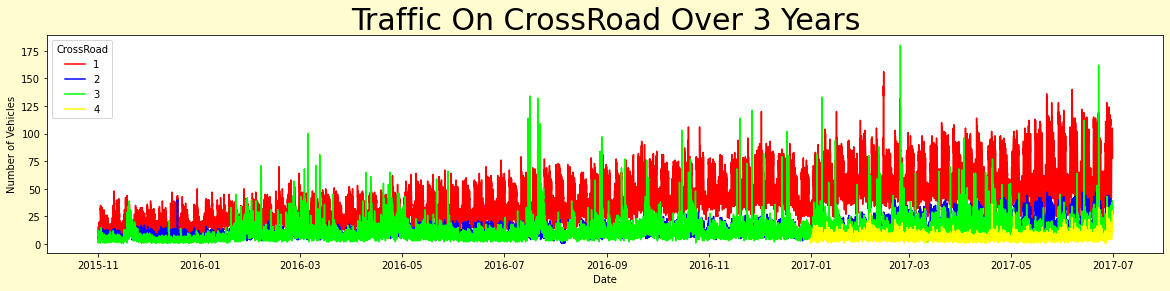

In [12]:
#df to be used for Exploratory Data analysis
#From now on we will be working on a copy of the main file
df=data.copy() 
#This is the timeseries chart of the data to give us a idea of how the traffic is at each of the four junctions
colors = [ "#FF0000","#0000FF","#00FF00","#FFFF00"]
plt.figure(figsize=(20,4),facecolor="#FFFDD0")
Time_series=sns.lineplot(x=df['DateTime'],y="Vehicles",data=df, hue="CrossRoad", palette=colors)
Time_series.set(title = "Traffic On CrossRoad Over 3 Years", ylabel = "Number of Vehicles", xlabel = "Date")
Time_series.set_title("Traffic On CrossRoad Over 3 Years",fontsize=30)

Some KEY takeaways:

->Over the years it is visible that their has been an upward trend in the number of cars passing each of the crossroads.

->This proves that the number of cars have rose in this particular locality

->Junction 1 is by far the most busiest crossroad, 

->Followed by crossroad 3

->Crossroad 2 has seen a moderate traffic/cars over the duration

->Crossroad 4 is looks like an upcoming junction and movement in that crossroad has started after 2017

->This graph provides us naive information on how the cars movement occurs in this locality.

We will now deepdive and break the datetime column into

    Year
    Month
    Date in the given month
    Days of week
    Hour


# Feature Engineering



In [13]:
df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")

df.head()


,DateTime,CrossRoad,Vehicles,Year,Month,Date,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday



# Exploratory Data Analysis

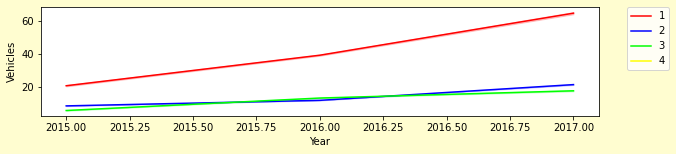

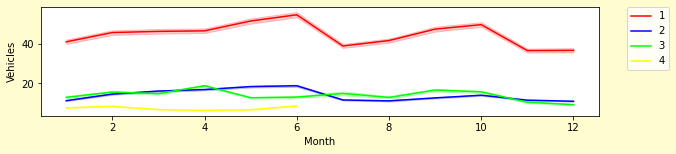

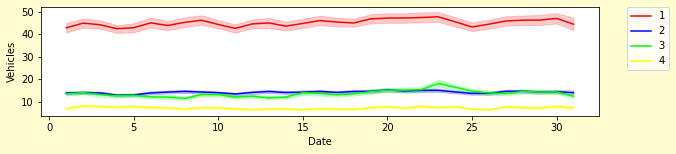

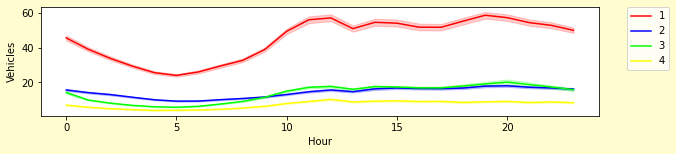

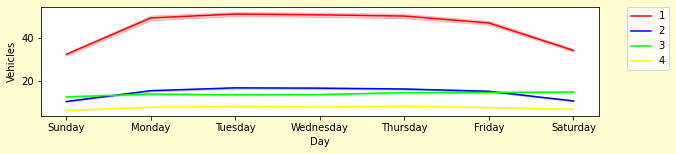

In [14]:
#Let's plot the Timeseries
new_features = [ "Year","Month", "Date", "Hour", "Day"]

for i in new_features:
    #This is a simple monocolor background for the Time series charts 
    plt.figure(figsize=(10,2),facecolor="#FFFDD0")
    ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="CrossRoad", palette=colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From the above plot following things can be concluded:

Yearly, there has been an upward trend for all junctions except for the fourth junction. As we already established above that the fourth junction has limited data and that don't span over a year.

We can see that there is an influx in the first and second junctions around June. I presume this may be due to summer break and activities around the same.

Monthly, throughout all the dates there is a good consistency in data.

For a day, we can see that are peaks during morning and evening times and a decline during night hours. This is as per expectation.

For weekly patterns, Sundays enjoy smoother traffic as there are lesser vehicles on roads. Whereas Monday to Friday the traffic is steady.

Text(0.5, 0, 'Year')

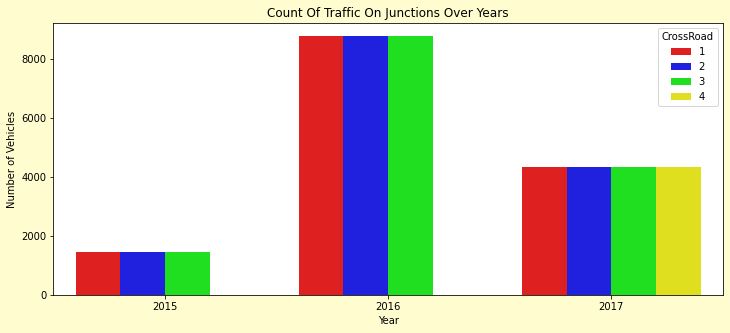

In [15]:
plt.figure(figsize=(12,5),facecolor="#FFFDD0")
count = sns.countplot(data=df, x =df["Year"], hue="CrossRoad", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Year")

The number of cars over the years has rosen.

Each crossroad has same amount of vechicles passing over the yearly timespan

It should be noted that junction 4 is relatively new and the dataset contains data of only 7/12 months. so this is where we will focus on and we will try predicting the vechicles in this crossroad point.

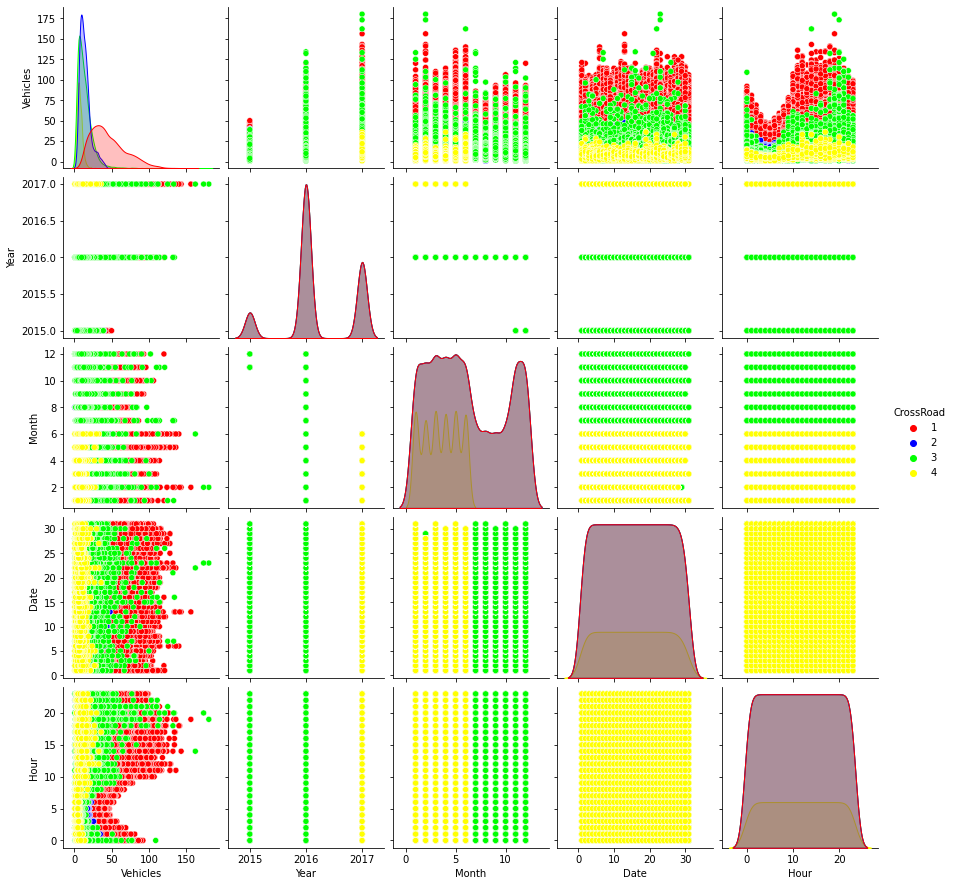

In [ ]:
sns.pairplot(data=df, hue= "CrossRoad",palette=colors)


Conclusions that I have come to draw after this EDA

The span of data from all four junctions is not the same. Data provided for the fourth junction is limited to only 2017.
The yearly trend for Junctions one, two and three have diffrent slopes.
Junction number one has a more strong weekly seasonality in comparison to the other junctions.
For the above-postulated reasons, I think that junctions must be transformed as per their individual needs.

In [16]:
#Pivoting data fron junction 
df_J = data.pivot(columns="CrossRoad", index="DateTime")
df_J.describe()

Vehicles                                         
CrossRoad             1             2             3            4
count      14592.000000  14592.000000  14592.000000  4344.000000
mean          45.052906     14.253221     13.694010     7.251611
std           23.008345      7.401307     10.436005     3.521455
min            5.000000      1.000000      1.000000     1.000000
25%           27.000000      9.000000      7.000000     5.000000
50%           40.000000     13.000000     11.000000     7.000000
75%           59.000000     17.000000     18.000000     9.000000
max          156.000000     48.000000    180.000000    36.000000

# Gauss Jordan Elimination Goes in Here

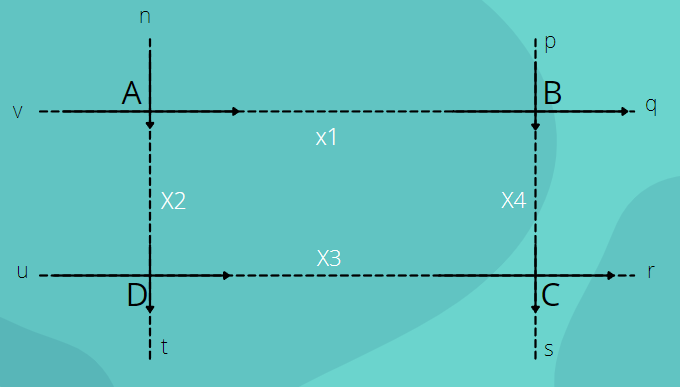

### At junction A: x1 + x2 + 0*x3 + 0*x4 = n+v 
### At junction B: -x1 + 0*x2 + 0*x3 + x4 = p-q 
### At junction C: 0*x1 + 0*x2 + x3 + x4 = (r+s)
### At junction D: 0*x1 - x2 + x3 + 0*x4 = u-t

In [ ]:
import numpy as np
from numpy import array, zeros 

def gssjrdn(a,b):
    a = np.array(a,float)
    b = np.array(b,float)
    n= len(b)

    #main loop
    for k in range(n):
        #partial pivoting 
        if np.fabs(a[k,k])< 1.0e-12:
            for i in range(k+1,n):
                if np.fabs(a[i,k]) >np.fabs(a[k,k]):
                    for j in range(k,n):
                        a[k,j],a[i,j] = a[i,j],a[k,j]
                    b[k],b[i]= b[i] ,b[k]
                    break
        #Division of the pivot row

        pivot = a[k,k]
        for j in range (k,n):
            a[k,j] /= pivot
        b[k] /=pivot

        #Elimination loop

        for i in range(n):
            if (i == k) or (a[i,k] ==0): continue
            factor =a[i,k]

            for j in range(k,n):
                a[i,j] -= factor * a[k,j]
            b[i] -= factor * b[k]
    
    return b,a

a = array([[1,1,0,0],
           [-1,0,0,1],
           [0,0,1,1],
           [0,-1,1,0]],float)


b = array([6,3,14,8],float)

X,A =gssjrdn(a,b)

print("The solution:")

print(X)

print("The transformed matrix is:")
print(A)

The solution:
[  3.   3. -inf  inf]
The transformed matrix is:
[[ 1.  0.  0.  0.]
 [ 0.  1. -0. -0.]
 [ 0.  0.  1. nan]
 [ 0.  0.  0. nan]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


The code produces error with some errors


In [ ]:
import numpy as np
from numpy import array, zeros 


# Markov Chains Application

In [17]:
#copy to work with on markov chains copy name: df2
df2 = df.copy()

#dropping of irrelevant columns 
df3 = df2.drop(["DateTime","Date","Hour","Day"], axis=1)

#making another duplicate copy to locate specific columns
df3 = df2.loc[:, ['CrossRoad', 'Vehicles', 'Month']]
print(df3)

#list to be appended in the post part of this snippet
total = []

#using a for loop to get the specific data i want. all junctions for the first 4 months and for the year 2017
for junc in range(1,5):
  for u in range(1,7):
    df3 = df2.loc[(df2.Year == 2017) & (df2.Month == u) & (df2.CrossRoad == junc)]
    total.append(df3['Vehicles'].sum())


#segregating the data here based on the indices
abc = pd.DataFrame( {'CrossRoad_1': total[:6], 
              'CrossRoad_2': total[6:12], 
              'CrossRoad_3': total[12:18], 
              'CrossRoad_4': total[18:24]},index=[ i for i in range(0,6)])
print(abc)


       CrossRoad  Vehicles  Month
0              1        15     11
1              1        13     11
2              1        10     11
3              1         7     11
4              1         9     11
...          ...       ...    ...
48115          4        11      6
48116          4        30      6
48117          4        16      6
48118          4        22      6
48119          4        12      6

[48120 rows x 3 columns]
   CrossRoad_1  CrossRoad_2  CrossRoad_3  CrossRoad_4
0        43439        10623        12299         5578
1        42116        12728        12669         5564
2        47111        16158        12877         4931
3        45245        16159        15578         4454
4        51327        18543         9903         4877
5        52853        18496        12954         6097


In [20]:
#locating the data ie.the first 4 entries
temp_M =abc.loc[:3, ['CrossRoad_1', 'CrossRoad_2', 'CrossRoad_3','CrossRoad_4']]
print(temp_M)
#Transposed the data to work on with probabilities based on a monthly period. I will be making predictions for each junction month wise, after this transpose
result = temp_M.transpose()
print(result)

#print to see how transposed Dataframe looks like
print(result)

#rename the absurd coulmn indices to a meaningful and understandable names
result.rename(columns = {0:'J',1:'F',2:'M',3:'A'}, inplace = True)
print(result)

#getting Matrix_A aka the probability matrix. The totals of the columns add upto 1.0 which is a essential property of the markove chains matrix
final = pd.DataFrame({'J': result['J']/result['J'].sum(), 'F': result['F']/result['F'].sum(),
                      'M': result['M']/result['M'].sum(),'A': result['A']/result['A'].sum()})

print(final)


   CrossRoad_1  CrossRoad_2  CrossRoad_3  CrossRoad_4
0        43439        10623        12299         5578
1        42116        12728        12669         5564
2        47111        16158        12877         4931
3        45245        16159        15578         4454
                 0      1      2      3
CrossRoad_1  43439  42116  47111  45245
CrossRoad_2  10623  12728  16158  16159
CrossRoad_3  12299  12669  12877  15578
CrossRoad_4   5578   5564   4931   4454
                 0      1      2      3
CrossRoad_1  43439  42116  47111  45245
CrossRoad_2  10623  12728  16158  16159
CrossRoad_3  12299  12669  12877  15578
CrossRoad_4   5578   5564   4931   4454
                 J      F      M      A
CrossRoad_1  43439  42116  47111  45245
CrossRoad_2  10623  12728  16158  16159
CrossRoad_3  12299  12669  12877  15578
CrossRoad_4   5578   5564   4931   4454
                    J         F         M         A
CrossRoad_1  0.603831  0.576324  0.581065  0.555590
CrossRoad_2  0.147667  0.1

In [19]:
#converted final into an array and stored it in matrix_A
matrix_A = final.to_numpy()

#Located the data for the preceeding month
Prob_ =abc.loc[4, ['CrossRoad_1', 'CrossRoad_2', 'CrossRoad_3','CrossRoad_4']]


#summing the Pd.Series to get some meaning later on
sum_p = Prob_.sum()

#This is the Probability of number of cars [4,1]

Matrix_P = [[Prob_[0]/sum_p ], [Prob_[1]/sum_p] ,[Prob_[2]/sum_p] ,[Prob_[3]/sum_p]]

#This is the unit number of cars matrix[4,1]
Matrix_p_units = [[51327] ,[18543] , [9903] , [4877]]
print(Matrix_P)


#Based on the data of April we will predict the data of May
result = np.dot(matrix_A,Matrix_p_units)
print(result)


#Based on the predicted data of May  we will predict the data of June
result_1 = np.dot(matrix_A,result)
print("*******")
print(result_1)

[[0.6063437684583579], [0.21905493207324275], [0.11698759598346131], [0.05761370348493798]]
[[50143.5001681 ]
 [13750.28358109]
 [14495.55784871]
 [ 6260.6584021 ]]
*******
[[50104.03119278]
 [13930.57447545]
 [14456.42372765]
 [ 6158.97060412]]
